# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
import random

In [36]:
def roll_dice():
    rolls = []
    for i in range(10):
        rolls.append(random.choice(range(1, 7)))
    df = pd.DataFrame({'Rolls': rolls})
    return df

roll_dice()

,Rolls
0,5
1,4
2,2
3,4
4,5
5,1
6,4
7,3
8,3
9,4


#### 2.- Plot the results sorted by value.

In [37]:
# your code here
df = roll_dice()
sorted_df = df.sort_values(by=['Rolls'], ascending=True)
sorted_df

,Rolls
0,1
2,1
7,2
9,2
1,3
5,4
3,5
4,5
6,5
8,6


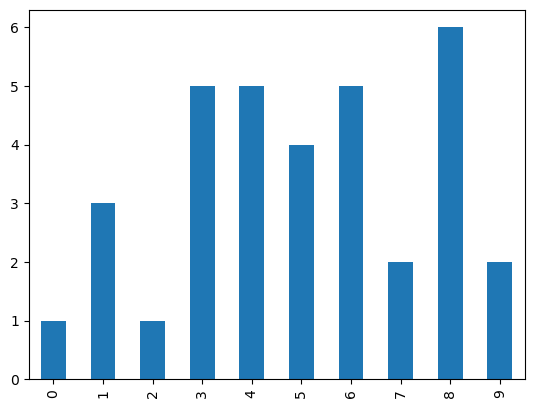

In [38]:
df.plot(kind='bar', x=None, y='Rolls', legend=None)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

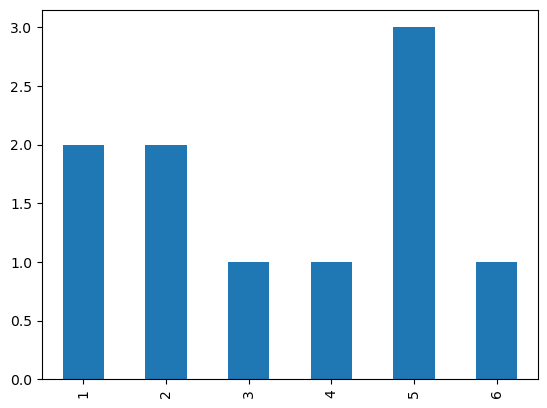

In [39]:
# your code here
counts = df['Rolls'].value_counts().sort_index()
counts.plot(kind='bar', x=None, y=None, legend=None)
plt.show()

In [ ]:
"""
The relationship between this plot and the plot above is that they both show the distribution of the dice rolls,
but in different ways. The first plot shows the actual roll values sorted in ascending order,
while the second plot shows the frequency of occurrence of each value. 
The first plot is useful for analyzing the actual roll sequence, while the second plot is useful
for analyzing the overall distribution of the rolls. For example, in the first plot, we can see if there are 
any patterns or trends in the roll sequence, while in the second plot, we can see if the rolls are evenly
distributed or skewed towards certain values.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [40]:
# your code here
def calculate_mean(x):
    return sum(x)/len(x)

calculate_mean(df["Rolls"])


3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [42]:
# your code here
def calculate_freq_dist(x):
    x = list(x)
    return {element:x.count(element) for element in x}

calculate_freq_dist(df["Rolls"])

{1: 2, 3: 1, 5: 3, 4: 1, 2: 2, 6: 1}

In [43]:
def calculate_mean_freq_dist(freq_dist):
    sum_elements = 0
    for key,value in freq_dist.items():
        sum_elements += int(key)*int(value)
    return sum_elements/sum(freq_dist.values())

freq_dist = calculate_freq_dist(df["Rolls"])

print(freq_dist)

calculate_mean_freq_dist(freq_dist)

{1: 2, 3: 1, 5: 3, 4: 1, 2: 2, 6: 1}


3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [44]:
# your code here

def calculate_median(x):
    sorted_data = sorted(data)
    length = len(sorted_data)
    if length % 2 == 0:
        median = (sorted_data[length//2 - 1] + sorted_data[length//2]) / 2
    else:
        median = sorted_data[length//2]
    return median

calculate_median(df["Rolls"])

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [48]:
# your code here

def calculate_quartiles(x):
    sorted_data = sorted(data)
    length = len(sorted_data)
    if length % 2 == 0:
        median_index = length // 2
        q1 = calculate_median(sorted_data[:median_index])
        q3 = calculate_median(sorted_data[median_index:])
    else:
        median_index = length // 2
        q1 = calculate_median(sorted_data[:median_index])
        q3 = calculate_median(sorted_data[median_index+1:])
    return q1, calculate_median(sorted_data), q3

calculate_quartiles(df["Rolls"])

(2.5, 2.5, 2.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [50]:
# your code here
df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/Descriptive-Stats/data/roll_the_dice_hundred.csv')
df.head(20)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [8]:
df.shape

(100, 3)

In [15]:
df = df.sort_values(by="value")
df

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


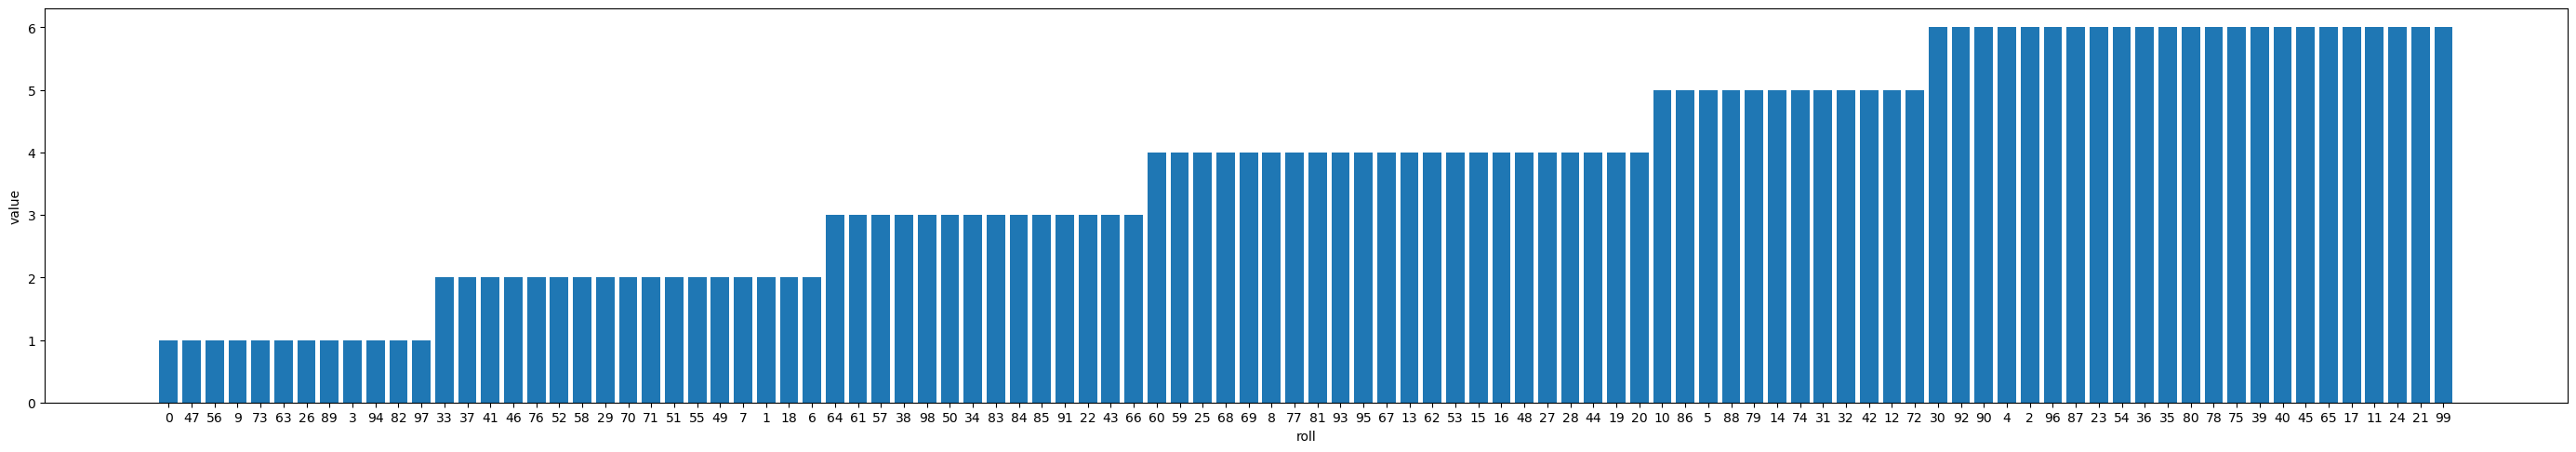

In [16]:

plt.figure(figsize=(35,5.5)) 
plt.bar(df["roll"].astype(str),df["value"])
plt.xlabel("roll")
plt.ylabel("value")
plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [51]:
# your code here

calculate_mean(df["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [52]:
# your code here

calculate_freq_dist(df["value"])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

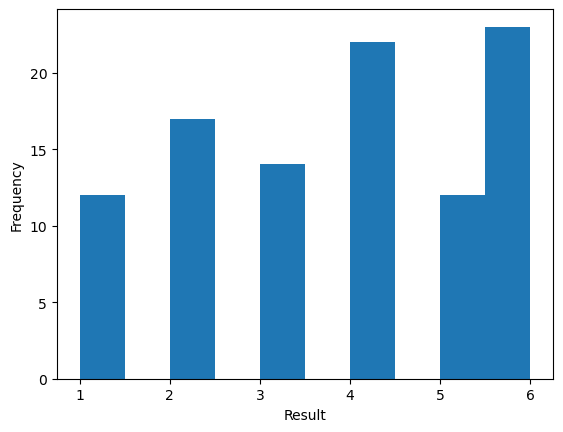

In [53]:
# your code here

plt.hist(df["value"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [54]:
# your code here

df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/Descriptive-Stats/data/roll_the_dice_thousand.csv')
df.head(20)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


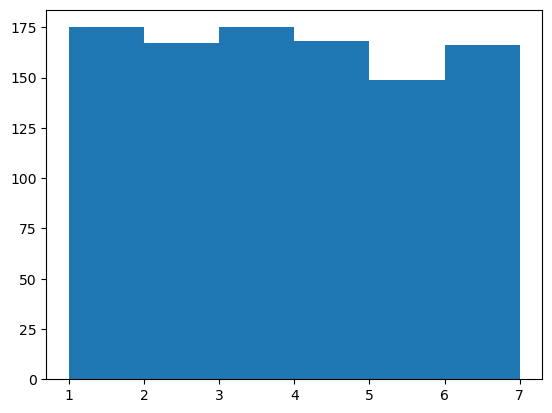

In [26]:
plt.hist(df['value'], bins=range(1, 8))
plt.show()

In [ ]:
"""
The results are very balanced what is to be expected

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [50]:
# your code here

df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/Descriptive-Stats/data/ages_population.csv')
df.head(20)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

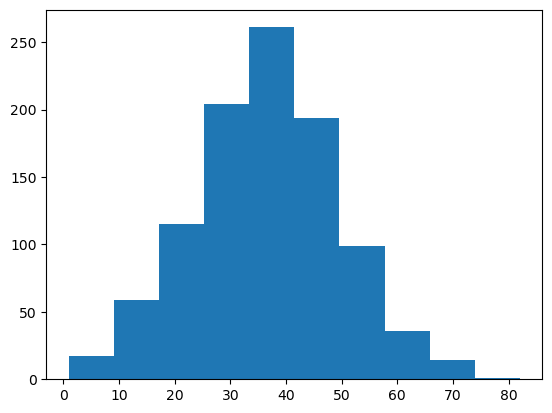

In [54]:
plt.hist(df)

In [43]:
freq_dist = df.value_counts()
freq_dist.head(20)

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
42.0           32
36.0           31
38.0           30
37.0           30
32.0           30
45.0           29
34.0           29
40.0           27
29.0           26
27.0           25
31.0           24
44.0           23
46.0           23
26.0           23
33.0           22
dtype: int64

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [39]:
# your code here

df.mean()

observation    36.56
dtype: float64

In [40]:
df.std()

observation    12.8165
dtype: float64

In [ ]:
"""
My guess was mean between 35 and 45 and the standard deviation 10.
I was right as the real mean is 36.56
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [59]:
# your code here

df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/Descriptive-Stats/data/ages_population2.csv')
df.head(20)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
5,29.0
6,28.0
7,30.0
8,24.0
9,26.0


In [60]:
freq_dist = df.value_counts()
freq_dist.head(20)

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

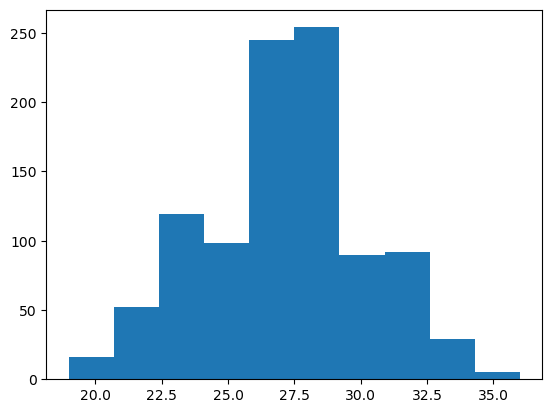

In [61]:
plt.hist(df)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [62]:
# your code here
print(df.mean())
print(df.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [63]:
# your code here
df = pd.read_csv('/Users/ricardomendes/Desktop/LABS/Week4/Descriptive-Stats/data/ages_population3.csv')
df.head(20)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
5,52.0
6,37.0
7,69.0
8,36.0
9,30.0


(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

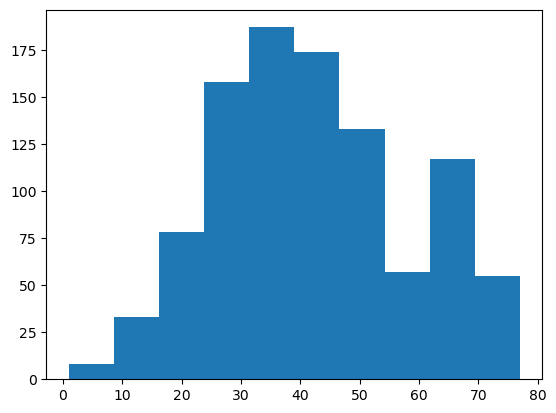

In [64]:
plt.hist(df)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [65]:
# your code here

print(df.mean())
print(df.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [67]:
# your code here

q1 = np.quantile(df, 0.25)
print(f"the first quartile is {q1}")
q2 = np.quantile(df, 0.50)
print(f"the second quartile is {q2}")
q3 = np.quantile(df, 0.75)
print(f"the third quartile is {q3}")

the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""